## Sharan S
## Assignment - 11 - Text mining - Amazon Customer Review

## Extract reviews of any product from ecommerce website like amazon
## Perform emotion mining

In [51]:
# link: https://www.amazon.com/Samsung-Unlocked-Smartphone-Intelligent-Lavender/dp/B09BFVK7YP/ref=sr_1_1_sspa?crid=3PUCI9K5DK83H&keywords=samsung+galaxy+s21&qid=1642331159&sprefix=sams%2Caps%2C396&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyWlhIU0JaNzZVRDhHJmVuY3J5cHRlZElkPUEwNTYzMDkzMjg1MEFPUkg4RDYzSiZlbmNyeXB0ZWRBZElkPUEwODQzODkwMkRNTjU3WVZOSUJWTCZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [6]:
review=pd.read_csv('C:\\Users\\SHARAN\\Desktop\\Amazon self.csv')
review

,Review
0,Ive been a Crapple guy since the Moto Razor......
1,Do not buy red phone if you have tmobile or sp...
2,I ve always been a Samsung guy but my last ph...
3,Edit: I m a super heavy user. I m at about the...
4,I had this phone for 2 months! I cannot use th...
...,...
247,La batería cámaras son geniales tiene todas ...
248,I am not sure if this is specific to my phone ...
249,The phone was great for the first 6 months but...
250,I bought this to replace the Pixel 3aXL I drop...


In [9]:
review=[Review.strip() for Review in review.Review] # remove both the leading and the trailing characters
review=[Review for Review in review if Review] # removes empty strings, because they are considered in Python as False
review[0:10]

['Ive been a Crapple guy since the Moto Razor....but Im so tired of their proprietary BS with MY Music That I PAID for. I am phasing them out  replaced my iPad and my third iPhone like the other two were acting sketchy ( blue screen of death and the jitters on the X) and when this laptop is soon to get replaced as well) Apple nows how to present their goods  kinda like Tiffany but w/o the diamond. Anyway while the packaging is as nice the S20 fe is Amazing. Easy to learn  fantastic camera and switching all my contacts  calendars and numbers took seconds without a cable! the best part at least to me was the pleasant surprise of finding that when I changed over my sims card that I could also install a hell of a lot of memory behind the sims card (I installed a gig card as that was all I had kicking around for my digital camera) and you can have your files and photo saved directly to it! Brilliant! I have to say that 90% of the apps I had on the X I down loaded through the google and Sams

In [10]:
# Joining the list into one string/text
review_text=' '.join(review)
review_text

'Ive been a Crapple guy since the Moto Razor....but Im so tired of their proprietary BS with MY Music That I PAID for. I am phasing them out  replaced my iPad and my third iPhone like the other two were acting sketchy ( blue screen of death and the jitters on the X) and when this laptop is soon to get replaced as well) Apple nows how to present their goods  kinda like Tiffany but w/o the diamond. Anyway while the packaging is as nice the S20 fe is Amazing. Easy to learn  fantastic camera and switching all my contacts  calendars and numbers took seconds without a cable! the best part at least to me was the pleasant surprise of finding that when I changed over my sims card that I could also install a hell of a lot of memory behind the sims card (I installed a gig card as that was all I had kicking around for my digital camera) and you can have your files and photo saved directly to it! Brilliant! I have to say that 90% of the apps I had on the X I down loaded through the google and Samsu

In [11]:
# Remove Punctuations 
no_punc_text=review_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Ive been a Crapple guy since the Moto Razorbut Im so tired of their proprietary BS with MY Music That I PAID for I am phasing them out  replaced my iPad and my third iPhone like the other two were acting sketchy  blue screen of death and the jitters on the X and when this laptop is soon to get replaced as well Apple nows how to present their goods  kinda like Tiffany but wo the diamond Anyway while the packaging is as nice the S20 fe is Amazing Easy to learn  fantastic camera and switching all my contacts  calendars and numbers took seconds without a cable the best part at least to me was the pleasant surprise of finding that when I changed over my sims card that I could also install a hell of a lot of memory behind the sims card I installed a gig card as that was all I had kicking around for my digital camera and you can have your files and photo saved directly to it Brilliant I have to say that 90 of the apps I had on the X I down loaded through the google and Samsung apps stores so

In [12]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Ive', 'been', 'a', 'Crapple', 'guy', 'since', 'the', 'Moto', 'Razorbut', 'Im', 'so', 'tired', 'of', 'their', 'proprietary', 'BS', 'with', 'MY', 'Music', 'That', 'I', 'PAID', 'for', 'I', 'am', 'phasing', 'them', 'out', 'replaced', 'my', 'iPad', 'and', 'my', 'third', 'iPhone', 'like', 'the', 'other', 'two', 'were', 'acting', 'sketchy', 'blue', 'screen', 'of', 'death', 'and', 'the', 'jitters', 'on']


In [14]:
len(text_tokens)

32329

In [15]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','Ive']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Crapple', 'guy', 'since', 'Moto', 'Razorbut', 'Im', 'tired', 'proprietary', 'BS', 'MY', 'Music', 'That', 'PAID', 'phasing', 'replaced', 'iPad', 'third', 'iPhone', 'like', 'two', 'acting', 'sketchy', 'blue', 'screen', 'death', 'jitters', 'X', 'laptop', 'soon', 'get', 'replaced', 'well', 'Apple', 'nows', 'present', 'goods', 'kinda', 'like', 'Tiffany', 'wo', 'diamond', 'Anyway', 'packaging', 'nice', 'S20', 'fe', 'Amazing', 'Easy', 'learn', 'fantastic', 'camera', 'switching', 'contacts', 'calendars', 'numbers', 'took', 'seconds', 'without', 'cable', 'best', 'part', 'least', 'pleasant', 'surprise', 'finding', 'changed', 'sims', 'card', 'could', 'also', 'install', 'hell', 'lot', 'memory', 'behind', 'sims', 'card', 'installed', 'gig', 'card', 'kicking', 'around', 'digital', 'camera', 'files', 'photo', 'saved', 'directly', 'Brilliant', 'say', '90', 'apps', 'X', 'loaded', 'google', 'Samsung', 'apps', 'stores', 'two', 'stores', 'vice', 'one', 'nice', 'verify', 'apps', 'virus', 'free', 'also', 

In [16]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['crapple', 'guy', 'since', 'moto', 'razorbut', 'im', 'tired', 'proprietary', 'bs', 'my', 'music', 'that', 'paid', 'phasing', 'replaced', 'ipad', 'third', 'iphone', 'like', 'two', 'acting', 'sketchy', 'blue', 'screen', 'death', 'jitters', 'x', 'laptop', 'soon', 'get', 'replaced', 'well', 'apple', 'nows', 'present', 'goods', 'kinda', 'like', 'tiffany', 'wo', 'diamond', 'anyway', 'packaging', 'nice', 's20', 'fe', 'amazing', 'easy', 'learn', 'fantastic', 'camera', 'switching', 'contacts', 'calendars', 'numbers', 'took', 'seconds', 'without', 'cable', 'best', 'part', 'least', 'pleasant', 'surprise', 'finding', 'changed', 'sims', 'card', 'could', 'also', 'install', 'hell', 'lot', 'memory', 'behind', 'sims', 'card', 'installed', 'gig', 'card', 'kicking', 'around', 'digital', 'camera', 'files', 'photo', 'saved', 'directly', 'brilliant', 'say', '90', 'apps', 'x', 'loaded', 'google', 'samsung', 'apps', 'stores', 'two', 'stores', 'vice', 'one', 'nice', 'verify', 'apps', 'virus', 'free', 'also', 

In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['crappl', 'guy', 'sinc', 'moto', 'razorbut', 'im', 'tire', 'proprietari', 'bs', 'my', 'music', 'that', 'paid', 'phase', 'replac', 'ipad', 'third', 'iphon', 'like', 'two', 'act', 'sketchi', 'blue', 'screen', 'death', 'jitter', 'x', 'laptop', 'soon', 'get', 'replac', 'well', 'appl', 'now', 'present', 'good', 'kinda', 'like', 'tiffani', 'wo', 'diamond', 'anyway', 'packag', 'nice', 's20', 'fe', 'amaz', 'easi', 'learn', 'fantast', 'camera', 'switch', 'contact', 'calendar', 'number', 'took', 'second', 'without', 'cabl', 'best', 'part', 'least', 'pleasant', 'surpris', 'find', 'chang', 'sim', 'card', 'could', 'also', 'instal', 'hell', 'lot', 'memori', 'behind', 'sim', 'card', 'instal', 'gig', 'card', 'kick', 'around', 'digit', 'camera', 'file', 'photo', 'save', 'directli', 'brilliant', 'say', '90', 'app', 'x', 'load', 'googl', 'samsung', 'app', 'store', 'two', 'store', 'vice', 'one', 'nice', 'verifi', 'app', 'viru', 'free', 'also', '5g', 'nice', 'get', 'area', 'also', 'understand', 'phone', '

In [18]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc)

crapple guy since moto razorbut im tired proprietary bs my music that paid phasing replaced ipad third iphone like two acting sketchy blue screen death jitters x laptop soon get replaced well apple nows present goods kinda like tiffany wo diamond anyway packaging nice s20 fe amazing easy learn fantastic camera switching contacts calendars numbers took seconds without cable best part least pleasant surprise finding changed sims card could also install hell lot memory behind sims card installed gig card kicking around digital camera files photo saved directly brilliant say 90 apps x loaded google samsung apps stores two stores vice one nice verify apps virus free also 5g nice get area also understand phone good overseas travel vacations business apps come phone intuitive unlike crapple never mastered this simple means much easier learn load book web bottom line wish listened friends instead snob bought sammy earlier and almost half coast do buy red phone tmobile sprint compatible even th

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['crapple', 'guy', 'since', 'moto', 'razorbut', 'I', 'm', 'tired', 'proprietary', 'b', 'my', 'music', 'that', 'pay', 'phase', 'replace', 'ipad', 'third', 'iphone', 'like', 'two', 'act', 'sketchy', 'blue', 'screen', 'death', 'jitter', 'x', 'laptop', 'soon', 'get', 'replace', 'well', 'apple', 'now', 'present', 'good', 'kinda', 'like', 'tiffany', 'will', 'diamond', 'anyway', 'package', 'nice', 's20', 'fe', 'amazing', 'easy', 'learn', 'fantastic', 'camera', 'switch', 'contact', 'calendar', 'number', 'take', 'second', 'without', 'cable', 'good', 'part', 'least', 'pleasant', 'surprise', 'finding', 'change', 'sim', 'card', 'could', 'also', 'install', 'hell', 'lot', 'memory', 'behind', 'sim', 'card', 'instal', 'gig', 'card', 'kick', 'around', 'digital', 'camera', 'file', 'photo', 'save', 'directly', 'brilliant', 'say', '90', 'app', 'x', 'load', 'google', 'samsung', 'app', 'store', 'two', 'store', 'vice', 'one', 'nice', 'verify', 'app', 'virus', 'free', 'also', '5', 'g', 'nice', 'get', 'area', 

In [20]:
clean_reviews=' '.join(lemmas)
clean_reviews

'crapple guy since moto razorbut I m tired proprietary b my music that pay phase replace ipad third iphone like two act sketchy blue screen death jitter x laptop soon get replace well apple now present good kinda like tiffany will diamond anyway package nice s20 fe amazing easy learn fantastic camera switch contact calendar number take second without cable good part least pleasant surprise finding change sim card could also install hell lot memory behind sim card instal gig card kick around digital camera file photo save directly brilliant say 90 app x load google samsung app store two store vice one nice verify app virus free also 5 g nice get area also understand phone good overseas travel vacation business app come phone intuitive unlike crapple never master this simple mean much easy learn load book web bottom line wish listen friend instead snob buy sammy early and almost half coast do buy red phone tmobile sprint compatible even though description work go 3 different tmobile loca

## Feature Extaction

## 1. Using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'crapple': 741, 'guy': 1299, 'since': 2563, 'moto': 1811, 'razorbut': 2273, 'tired': 2875, 'proprietary': 2216, 'my': 1832, 'music': 1826, 'that': 2828, 'pay': 2029, 'phase': 2064, 'replace': 2356, 'ipad': 1497, 'third': 2842, 'iphone': 1498, 'like': 1621, 'two': 2942, 'act': 191, 'sketchy': 2575, 'blue': 461, 'screen': 2465, 'death': 796, 'jitter': 1527, 'laptop': 1574, 'soon': 2629, 'get': 1244, 'well': 3109, 'apple': 307, 'now': 1898, 'present': 2160, 'good': 1266, 'kinda': 1552, 'tiffany': 2865, 'will': 3137, 'diamond': 846, 'anyway': 297, 'package': 1991, 'nice': 1866, 's20': 2421, 'fe': 1085, 'amazing': 267, 'easy': 935, 'learn': 1590, 'fantastic': 1076, 'camera': 548, 'switch': 2771, 'contact': 704, 'calendar': 537, 'number': 1901, 'take': 2778, 'second': 2478, 'without': 3149, 'cable': 533, 'part': 2012, 'least': 1591, 'pleasant': 2110, 'surprise': 2762, 'finding': 1113, 'change': 587, 'sim': 2553, 'card': 558, 'could': 727, 'also': 260, 'install': 1475, 'hell': 1338, 'lot': 1

In [23]:
print(cv.get_feature_names()[150:300])

['8mp', '8now', '8s', '8th', '90', '90htz', '910', '914', '93', '94', '960', '97', '9w', 'a12', 'a52', 'a71', 'abandon', 'ability', 'able', 'aboutprosbattery', 'aboutthere', 'abriendo', 'abrir', 'absolutely', 'abuse', 'accept', 'acceptable', 'accesorios', 'access', 'accessory', 'accident', 'accidental', 'accord', 'account', 'accountability', 'accountant', 'accurate', 'accurately', 'acquaintance', 'acreen', 'across', 'act', 'action', 'activando', 'activate', 'active', 'actual', 'actualizacione', 'actualización', 'actually', 'acá', 'ad', 'adapt', 'adapter', 'adaptinghas', 'adaptive', 'add', 'addictive', 'addition', 'additional', 'additionally', 'address', 'además', 'adequate', 'adhesive', 'adjust', 'admittedly', 'advanced', 'advertise', 'advertisement', 'advertisingthis', 'advice', 'advise', 'affect', 'afford', 'affordable', 'afraid', 'after', 'aftermarket', 'againi', 'againmaybe', 'age', 'aggressive', 'ago', 'agoi', 'agoway', 'agrada', 'ahead', 'ahora', 'ai', 'aid', 'air', 'akg', 'akwar

In [24]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviewscv.toarray().shape)

(17262, 3200)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'android', 'app', 'back', 'bad', 'battery', 'big', 'box', 'but', 'buy', 'call', 'camera', 'card', 'case', 'charge', 'come', 'could', 'day', 'even', 'everything', 'face', 'far', 'fast', 'fe', 'feature', 'feel', 'find', 'finger', 'fingerprint', 'first', 'fix', 'galaxy', 'gb', 'get', 'give', 'go', 'good', 'google', 'great', 'if', 'issue', 'keep', 'last', 'life', 'like', 'little', 'look', 'lot', 'love', 'make', 'month', 'much', 'need', 'never', 'new', 'nice', 'not', 'old', 'one', 'phone', 'picture', 'pixel', 'pretty', 'price', 'problem', 'purchase', 'quality', 'ram', 'reader', 'really', 'return', 's20', 'samsung', 'say', 'screen', 'see', 'seem', 'sim', 'still', 'support', 'take', 'thing', 'think', 'this', 'time', 'touch', 'try', 'turn', 'two', 'update', 'upgrade', 'use', 'want', 'way', 'well', 'work', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## ### 3. TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [29]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '11', '120hz', '15', '20', '30', '3x', '4a', '600', '865', 'able', 'absolutely', 'accidental', 'account', 'activate', 'actually', 'add', 'adjust', 'affect', 'after', 'all', 'allow', 'almost', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'and', 'android', 'angle', 'annoying', 'another', 'anyone', 'anything', 'app', 'apple', 'area', 'around', 'aspect', 'at', 'att', 'audio', 'available', 'away', 'awesome', 'back', 'bad', 'battery', 'be', 'beautiful', 'big', 'bit', 'bixby', 'black', 'bloatware', 'bluetooth', 'box', 'brand', 'break', 'bright', 'brightness', 'bug', 'build', 'but', 'button', 'buy', 'call', 'camera', 'capability', 'card', 'care', 'carrier', 'case', 'cause', 'cell', 'certain', 'chance', 'change', 'charge', 'charger', 'cheap', 'check', 'choice', 'choose', 'clear', 'close', 'cloud', 'color', 'come', 'company', 'compare', 'comparison', 'compatible', 'complain', 'complaint', 'completely', 'con', 'connect', 'consider', 'contact', 'correct', 'cost', 'cou

## Generate Word Cloud

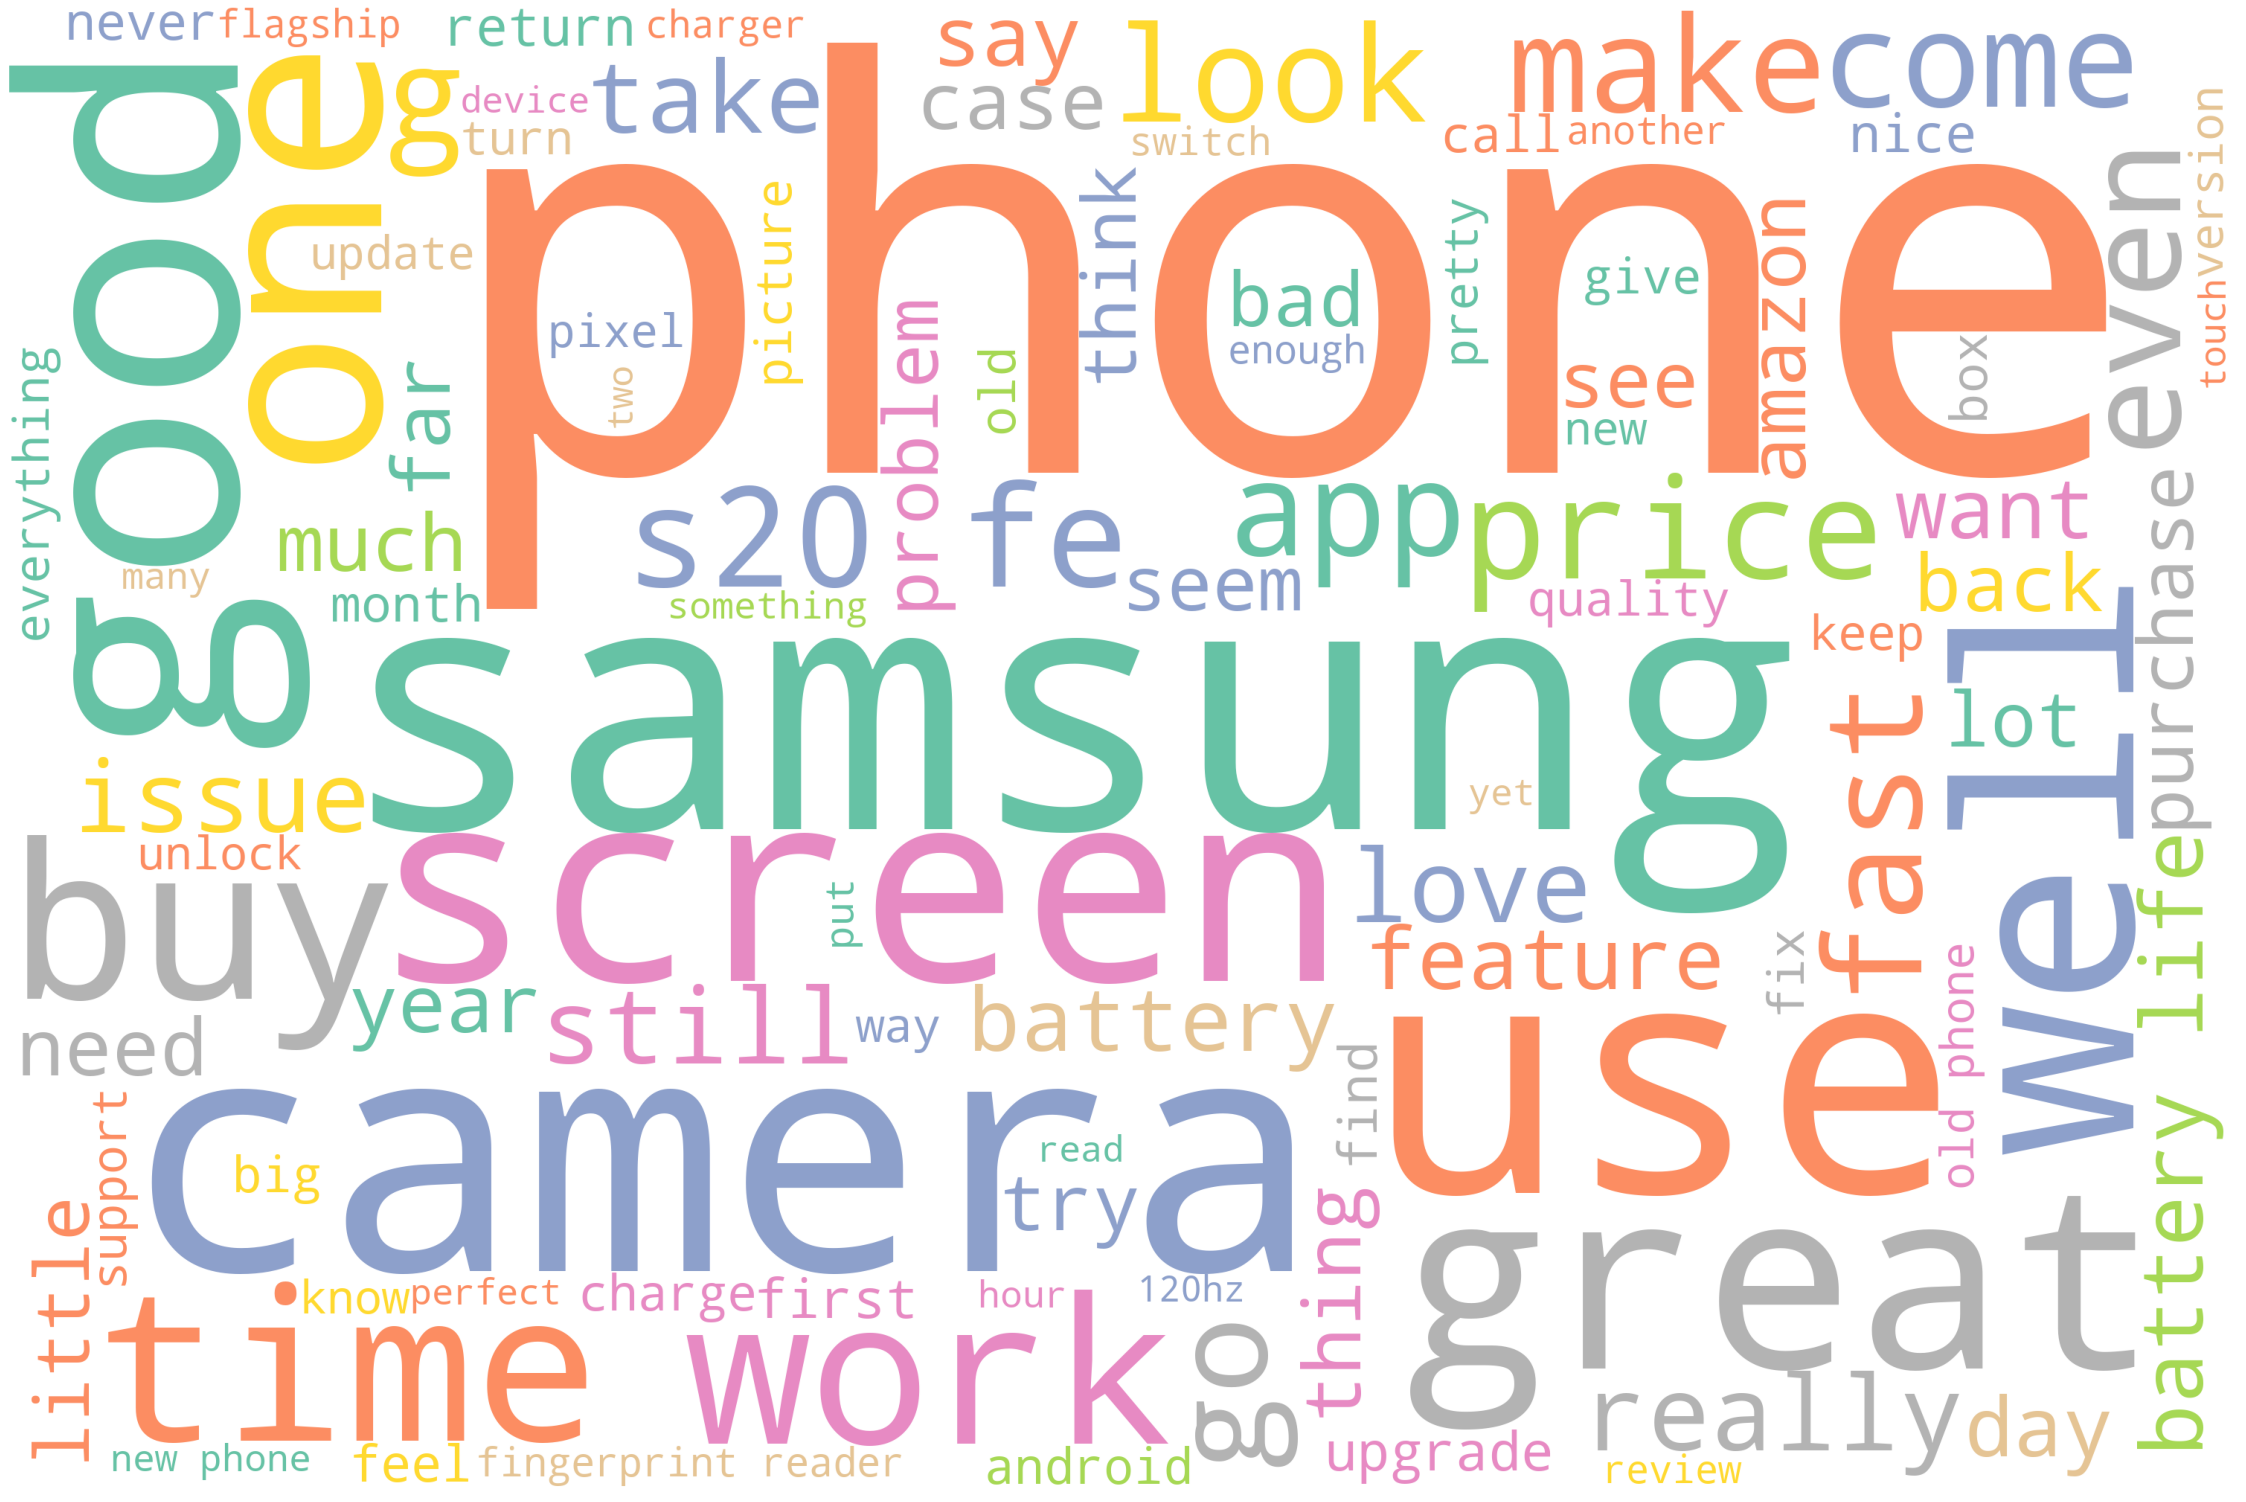

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [31]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_md')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

store NOUN
vice NOUN
one NUM
nice ADJ
verify VERB
app NOUN
virus NOUN
free ADJ
also ADV
5 NUM
g NOUN
nice ADJ
get NOUN
area NOUN
also ADV
understand VERB
phone NOUN
good ADJ
overseas ADJ
travel NOUN
vacation NOUN
business NOUN
app NOUN
come VERB
phone NOUN
intuitive ADJ
unlike SCONJ
crapple NOUN
never ADV
master VERB
this DET
simple ADJ
mean ADJ
much ADV
easy ADJ
learn VERB
load NOUN
book NOUN
web NOUN
bottom NOUN
line NOUN
wish VERB
listen VERB
friend NOUN
instead ADV
snob NOUN
buy VERB
sammy PROPN
early ADV
and CCONJ
almost ADV
half NOUN
coast NOUN
do AUX
buy VERB
red ADJ
phone NOUN
tmobile PROPN
sprint NOUN
compatible ADJ
even ADV
though SCONJ
description NOUN
work NOUN
go VERB
3 NUM
different ADJ
tmobile NOUN
location NOUN
issue NOUN
escalate VERB
find VERB
entire ADJ
line NOUN
red ADJ
phone NOUN
compatible ADJ
submit NOUN
refund NOUN
recieve VERB
item NOUN
july PROPN
2 NUM
july PROPN
14 NUM
yet CCONJ
get VERB
money NOUN
back ADV
no DET
response NOUN
send VERB
message NOUN
either C

In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['send', 'message', 'phone', 'moto', 'play', 'camera', 'battery', 'get', 'month', 'phone', 'act', 'buggy', 'factory', 'reset', 'blow', 'screen', 'size', 'g', 'camera', '120hz', 'downplay', 'butter', 'love', 'screen', 'print', 'scanner', 'matter', 'people', 'say', 'keep', 'reentere', 'thumb', 'finger', 'flawlews', 'screen', 'gorrilla', 'galss', 'battery', 'life', 'lot', 'end', 'day', 'supply', 'charger', 'menu', 'love', 'stereo', 'speaker', 'experience', 'need', 'get', 'price', 'sell', 'ship', 'want', 'edit', 'user', 'month', 'device', 'get', 'tax', 'weather', 'battery', 'life', 'whuch', 'drop', 'love', 'phone', 'longevity', 'come', 'summer', 'floridamark', 'edit', 'month', 'love', 'battery', 'day', 'phone', 'use', 'change', 'button', 'put', 'setting', 'power', 'option', 'come', 'screenshot', 'method', 'supcase', 'grade', 'unicorn', 'beetle', 'case', 'protect', 'signal', 'g', 'g', 'turn', 'screen', 'work']


In [34]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,783
1,get,180
2,screen,158
3,use,158
4,camera,153
5,battery,120
6,work,119
7,time,95
8,buy,91
9,price,80


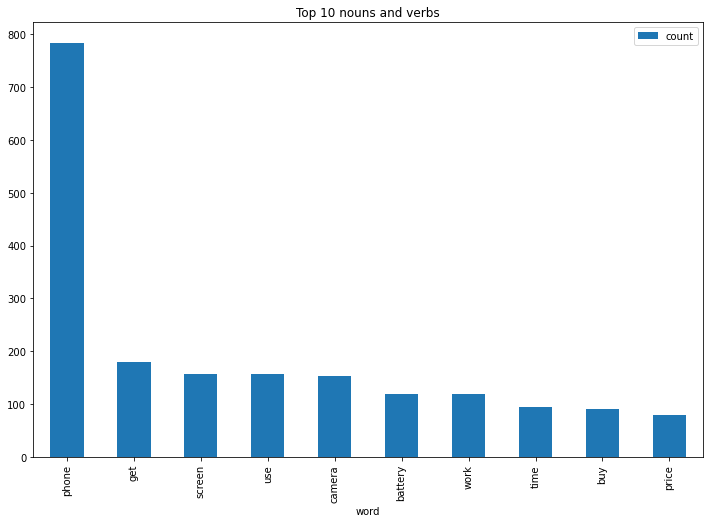

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [36]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review))
sentences

['Ive been a Crapple guy since the Moto Razor....but Im so tired of their proprietary BS with MY Music That I PAID for.',
 'I am phasing them out  replaced my iPad and my third iPhone like the other two were acting sketchy ( blue screen of death and the jitters on the X) and when this laptop is soon to get replaced as well) Apple nows how to present their goods  kinda like Tiffany but w/o the diamond.',
 'Anyway while the packaging is as nice the S20 fe is Amazing.',
 'Easy to learn  fantastic camera and switching all my contacts  calendars and numbers took seconds without a cable!',
 'the best part at least to me was the pleasant surprise of finding that when I changed over my sims card that I could also install a hell of a lot of memory behind the sims card (I installed a gig card as that was all I had kicking around for my digital camera) and you can have your files and photo saved directly to it!',
 'Brilliant!',
 'I have to say that 90% of the apps I had on the X I down loaded thr

In [37]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Ive been a Crapple guy since the Moto Razor......
1,I am phasing them out replaced my iPad and my...
2,Anyway while the packaging is as nice the S20 ...
3,Easy to learn fantastic camera and switching ...
4,the best part at least to me was the pleasant ...
...,...
1895,Came unlocked as advertised.
1896,Did the transfer from my old S7 by myself with...
1897,Highly recommended!
1898,Saved a lot of money!!


In [38]:
# Emotion Lexicon - Affin
affin=pd.read_csv('C:\\Users\\SHARAN\\Desktop\\ExcelR\\Notes\\Emotion mining\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [39]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [40]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [41]:
# manual testing
calculate_sentiment(text='good service')

3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      -3
1       6
2       7
3       5
4       4
       ..
1895    0
1896   -3
1897    2
1898    2
1899    0
Name: sentiment_value, Length: 1900, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       23
1       55
2       12
3       18
4       66
        ..
1895     4
1896    12
1897     2
1898     5
1899     1
Name: word_count, Length: 1900, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1528,Ok so I bought a new phone since TMobile kept ...,-10,34
1079,No trauma no visible damage but the lens rat...,-10,124
496,Even with the block accidental touches optio...,-8,84
587,Stupid small pockets.Cons:- the vibrate is ter...,-7,8
1278,If it ends up being crap you can always send i...,-6,27
...,...,...,...
1374,Face id works great fingerprint reader works ...,15,38
372,Battery if the phone starts at 100% by the e...,17,93
111,Good battery good screen good camera fast c...,18,27
891,This will not be my last phone but it will be ...,20,311


In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1900.000000
mean        0.986842
std         2.695409
min       -10.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Ive been a Crapple guy since the Moto Razor......,-3,23
8,The apps that come with this phone are intuiti...,0,15
10,Bottom Line?,0,2
12,And at almost Half the coast!!!,0,6
13,Do not buy red phone if you have tmobile or sp...,0,15
...,...,...,...
1888,I bought this to replace the Pixel 3aXL I drop...,-1,10
1890,It does come with the usual amount of Samsung ...,0,14
1895,Came unlocked as advertised.,0,4
1896,Did the transfer from my old S7 by myself with...,-3,12


In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
1,I am phasing them out replaced my iPad and my...,6,55
2,Anyway while the packaging is as nice the S20 ...,7,12
3,Easy to learn fantastic camera and switching ...,5,18
4,the best part at least to me was the pleasant ...,4,66
5,Brilliant!,4,1
...,...,...,...
1892,What a great phone and value.,3,6
1893,If you re looking for a flagship phone minus j...,1,19
1894,This phone is amazing fast and has a great ca...,7,12
1897,Highly recommended!,2,2


In [48]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Ive been a Crapple guy since the Moto Razor......,-3,23,0
1,I am phasing them out replaced my iPad and my...,6,55,1
2,Anyway while the packaging is as nice the S20 ...,7,12,2
3,Easy to learn fantastic camera and switching ...,5,18,3
4,the best part at least to me was the pleasant ...,4,66,4
...,...,...,...,...
1895,Came unlocked as advertised.,0,4,1895
1896,Did the transfer from my old S7 by myself with...,-3,12,1896
1897,Highly recommended!,2,2,1897
1898,Saved a lot of money!!,2,5,1898


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

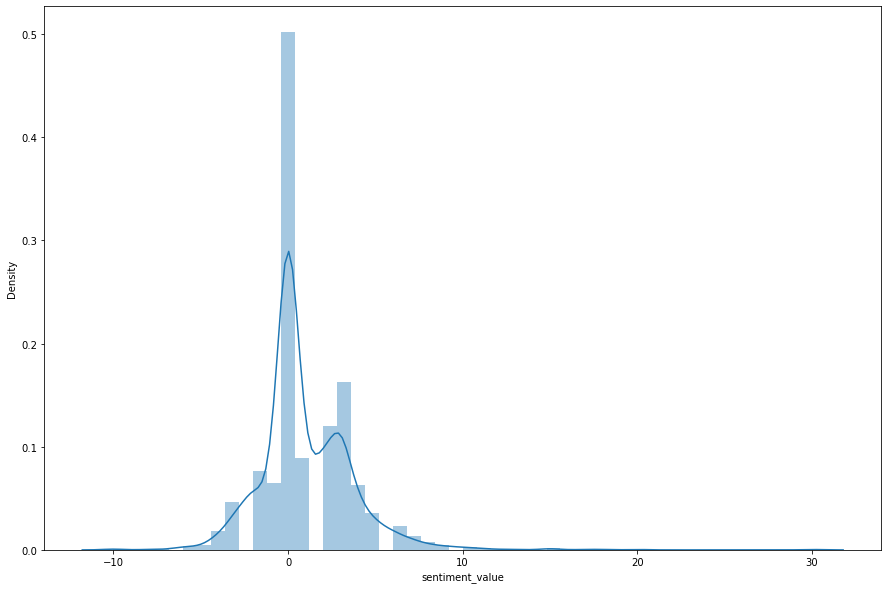

In [49]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

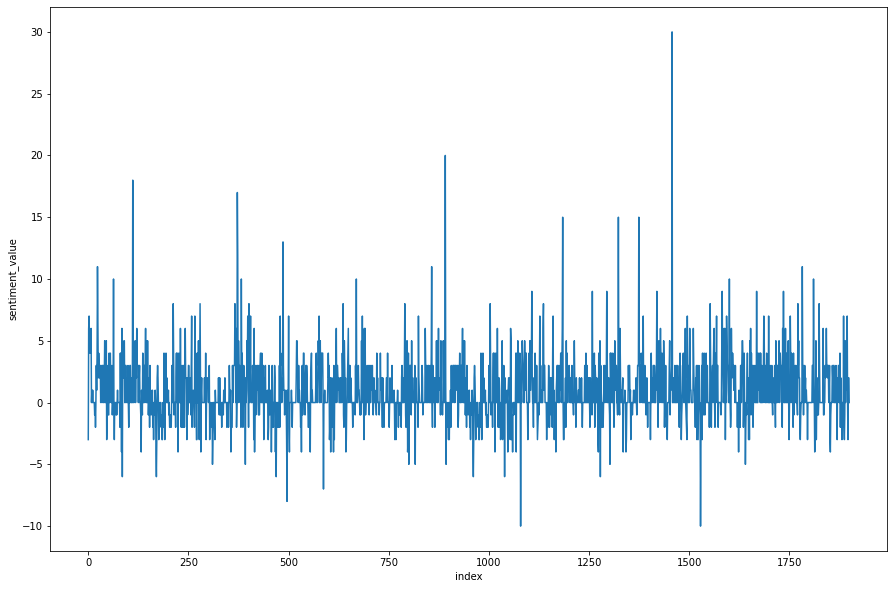

In [50]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)